<a href="https://colab.research.google.com/github/hermannvargens/doutorado/blob/main/PLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

In [2]:
# Carregar os dados e excluir colunas desnecessárias
df = pd.read_csv("/content/drive/MyDrive/Doutorado/Machine Learning/espectros_derivada.csv", delimiter=";")
df = df[:-3]
df

,xAgua,xEtanol,xDEC,"908,1",914,920,927,933,939,945,...,1.620,1.627,1.633,1.639,1.645,1.651,1.658,1.664,1.670,"1676,2"
0,"0,109202452","0,443840146","0,44695738",0.0,0.0,0.0,"-0,035489809","-0,028431138","-0,021888284","-0,015950946",...,"-0,023954228","-0,022647167","-0,019736614","-0,014472826","-0,005844047","0,007157847","0,024688952",0.0,0.0,0.0
1,"0,105293132","0,80927974","0,085427135",0.0,0.0,0.0,"-0,041031055","-0,0331279","-0,0254937","-0,018452086",...,"-0,04443121","-0,04393705","-0,041300945","-0,036292866","-0,028710388","-0,018118283","-0,003920857",0.0,0.0,0.0
2,"0,092756711","0,272372901","0,63487041",0.0,0.0,0.0,"-0,031241261","-0,025095809","-0,019560231","-0,014554382",...,"-0,0117595","-0,010493879","-0,007847009","-0,002771711","0,006004313","0,019665975","0,038095899",0.0,0.0,0.0
3,"0,093054257","0,363251567","0,543694198",0.0,0.0,0.0,"-0,033210442","-0,026683258","-0,020717088","-0,01532816",...,"-0,017689038","-0,016376007","-0,013593622","-0,008397519","0,000346713","0,013744867","0,031874158",0.0,0.0,0.0
4,"0,092692807","0,453869402","0,453437805",0.0,0.0,0.0,"-0,035365574","-0,028417021","-0,02202756","-0,016220015",...,"-0,023707241","-0,022415469","-0,019502938","-0,014224177","-0,005581841","0,007445717","0,0250457",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"0,014857752","0,790425718","0,194716498",0.0,0.0,0.0,"-0,038053609","-0,030713674","-0,023729606","-0,017379601",...,"-0,042829096","-0,041972216","-0,038693361","-0,03293065","-0,024540657","-0,013093825","0,001900243",0.0,0.0,0.0
71,"0,109965973","0,828527093","0,061506953",0.0,0.0,0.0,"-0,03931861","-0,031465888","-0,023820834","-0,016879169",...,"-0,046250843","-0,046098214","-0,043704275","-0,038896464","-0,031626586","-0,021783717","-0,008930095",0.0,0.0,0.0
72,"0,07540144","0,901858449","0,022740118",0.0,0.0,0.0,"-0,04006521","-0,032246247","-0,024648899","-0,017726744",...,"-0,049130522","-0,049217291","-0,046832807","-0,041960657","-0,034628548","-0,024921278","-0,012282481",0.0,0.0,0.0
73,"0,035094127","0,945947766","0,018958133",0.0,0.0,0.0,"-0,040456675","-0,032776933","-0,02527668","-0,01840662",...,"-0,051265776","-0,051333442","-0,048659384","-0,043421906","-0,03574378","-0,025752449","-0,012841927",0.0,0.0,0.0


### 1 - Formatando os dados

In [3]:
# Substituir '.' por '' e ',' por '.' nos nomes das colunas
df.columns = [col.replace('.', '').replace(',', '.') for col in df.columns]

# substituir o ponto por '' e a virgula por ponto em todas as colunas do df
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains strings
        df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    #For numeric columns with decimal separators as '.' and ','
    elif pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Transformar todas as colunas para float
for col in df.columns:
  df[col] = df[col].astype(float)


### 2 - Visualização dos Espectros (Já pré-processados, 1ª Derivada, 7 pontos GV)

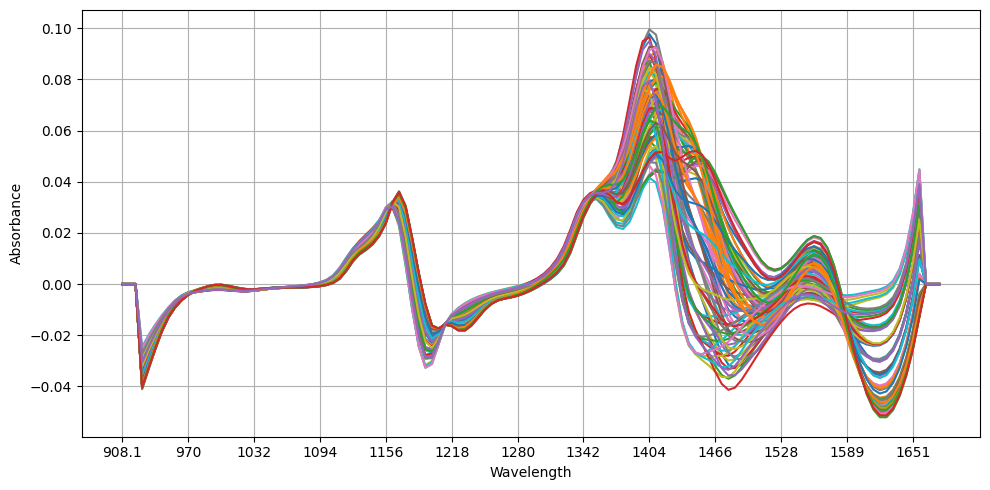

In [6]:
# Dividir o df, tomando da 4ª coluna em diante, onde estão os valores de Absorbance
df_espectros = df.iloc[:, 3:]

# Transpor os dados
df_espectros = df_espectros.T

# Plotar todos os valores
plt.figure(figsize=(10,5))

for column in df_espectros.columns:
    plt.plot(df_espectros.index, df_espectros[column], label=column)

plt.xlabel("Wavelength")
plt.ylabel("Absorbance")
#plt.title("Spectral Data")
#plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(df_espectros.index), 10))
plt.tight_layout()
plt.show()

### 3 - Modelagem

#### 3.1 - Dividindo os datasets em treino e teste

Para este trabalho, as amostras de 1 a 53 foram utilizadas para calibração e as amostras de 54 a 75 para validação.

In [7]:
# Separar as variáveis preditoras (X) e as saídas (y)
comprimentos_de_onda = [col for col in df.columns if col not in ["xAgua", "xEtanol", "xDEC"]]
X = df[comprimentos_de_onda].values  # Matriz de características
y = df[["xAgua", "xEtanol", "xDEC"]].values  # Saídas (concentrações das substâncias)

# Separar os conjuntos de treino e teste
X_train = X[:53, :]  # Amostras 0 a 52
X_test = X[53:, :]   # Amostras 53 a 75
y_train = y[:53, :]  # Concentrações de treino
y_test = y[53:, :]   # Concentrações de teste da Mistura

# Separar as colunas de y_train em 3 variáveis
y_train_agua = y_train[:, 0]  # Coluna 0 (xAgua)
y_train_etanol = y_train[:, 1]  # Coluna 1 (xEtanol)
y_train_dec = y_train[:, 2]   # Coluna 2 (xDEC)

# Separar as colunas de y_test em 3 variáveis
y_test_agua = y_test[:, 0]  # Coluna 0 (xAgua)
y_test_etanol = y_test[:, 1]  # Coluna 1 (xEtanol)
y_test_dec = y_test[:, 2]   # Coluna 2 (xDEC)

#### 3.2 - Calibração

Algoritmo PLS

Pretende-se realizar a calibração dos dados para 4 casos:
- Predição do teor de água (PLS1)
- Predição do teor de etanol (PLS1)
- Predição do teor de DEC (PLS1)
- Predição do teor de água, etanol e DEC (PLS2)

Variando o número de variáveis latentes de 3 a 15, para encontrar qual o melhor valor, baseado no RMSEC (RMSE calibração)

In [9]:
#Calibração para a Água

lv_num = list(range(3,15))

rmsec_agua =[]
r2c_agua = []
for lv in range(3,15):
    pls = PLSRegression(n_components=lv)
    scores = cross_validate(pls, X_train, y_train_agua, scoring=['neg_mean_squared_error', 'r2'], cv=5)
    rmse = np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    rmsec_agua.append(rmse*100)
    r2c_agua.append(np.mean(scores['test_r2']))
    #print(f"lv: {lv}, RMSE: {rmse:.6f}")

##Calibração para o Etanol

rmsec_etanol =[]
r2c_etanol = []
for lv in range(3,15):
    pls = PLSRegression(n_components=lv)
    scores = cross_validate(pls, X_train, y_train_etanol, scoring=['neg_mean_squared_error', 'r2'], cv=5)
    rmse = np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    rmsec_etanol.append(rmse*100)
    r2c_etanol.append(np.mean(scores['test_r2']))
    #print(f"lv: {lv}, RMSE: {rmse:.6f}")

##Calibração para o DEC

rmsec_dec =[]
r2c_dec = []
for lv in range(3,15):
    pls = PLSRegression(n_components=lv)
    scores = cross_validate(pls, X_train, y_train_dec, scoring=['neg_mean_squared_error', 'r2'], cv=5)
    rmse = np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    rmsec_dec.append(rmse*100)
    r2c_dec.append(np.mean(scores['test_r2']))
    #print(f"lv: {lv}, RMSE: {rmse:.6f}")

#Calibração para a mistura de 3 substâncias

rmsec_mistura =[]
r2c_mistura = []
for lv in range(3,15):
    pls = PLSRegression(n_components=lv)
    scores = cross_validate(pls, X_train, y_train, scoring=['neg_mean_squared_error', 'r2'], cv=5)
    rmse = np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    rmsec_mistura.append(rmse*100)
    r2c_mistura.append(np.mean(scores['test_r2']))
    #print(f"lv: {lv}, RMSE: {rmse:.6f}")

df_results_treino = {
    'lv': lv_num,
    'RMSEC_agua': rmsec_agua,
    'R²c_agua': r2c_agua,
    'RMSEC_etanol': rmsec_etanol,
    'R²c_etanol': r2c_etanol,
    'RMSEC_dec': rmsec_dec,
    'R²c_dec': r2c_dec,
    'RMSEC_mistura': rmsec_mistura,
    'R²c_mistura': r2c_mistura,
}

df_results_treino = pd.DataFrame(df_results_treino)

def highlight_min(s):
  is_min = s == s.min()
  return ['background-color: yellow' if v else '' for v in is_min]

df_results_treino.style.apply(highlight_min, subset=['RMSEC_agua', 'RMSEC_etanol', 'RMSEC_dec', 'RMSEC_mistura'])




,lv,RMSEC_agua,R²c_agua,RMSEC_etanol,R²c_etanol,RMSEC_dec,R²c_dec,RMSEC_mistura,R²c_mistura
0,3,0.470056,0.895557,0.599679,0.991821,0.899167,0.988977,0.972220,0.959501
1,4,0.298232,0.946600,0.398924,0.995548,0.450761,0.995024,0.407749,0.978575
2,5,0.288470,0.947001,0.328983,0.995776,0.269398,0.997585,0.307100,0.979715
3,6,0.264420,0.951945,0.306449,0.995686,0.203982,0.997113,0.289031,0.981371
4,7,0.245235,0.957907,0.315761,0.994929,0.173180,0.997792,0.281290,0.983640
5,8,0.243554,0.960561,0.341646,0.996353,0.148343,0.998840,0.271601,0.985330
6,9,0.269747,0.952991,0.349550,0.997196,0.145718,0.998941,0.281318,0.981310
7,10,0.271024,0.950425,0.357475,0.996493,0.134364,0.999257,0.281197,0.980440
8,11,0.276966,0.947251,0.365039,0.995338,0.139255,0.999195,0.273710,0.980411
9,12,0.302507,0.943635,0.399318,0.994388,0.138373,0.999255,0.300002,0.978579


#### 3.3 - Escolha do melhor número de componentes

Visualização gráfica do comportamento de RMSEC com o número de variáveis latentes, para cada calibração.

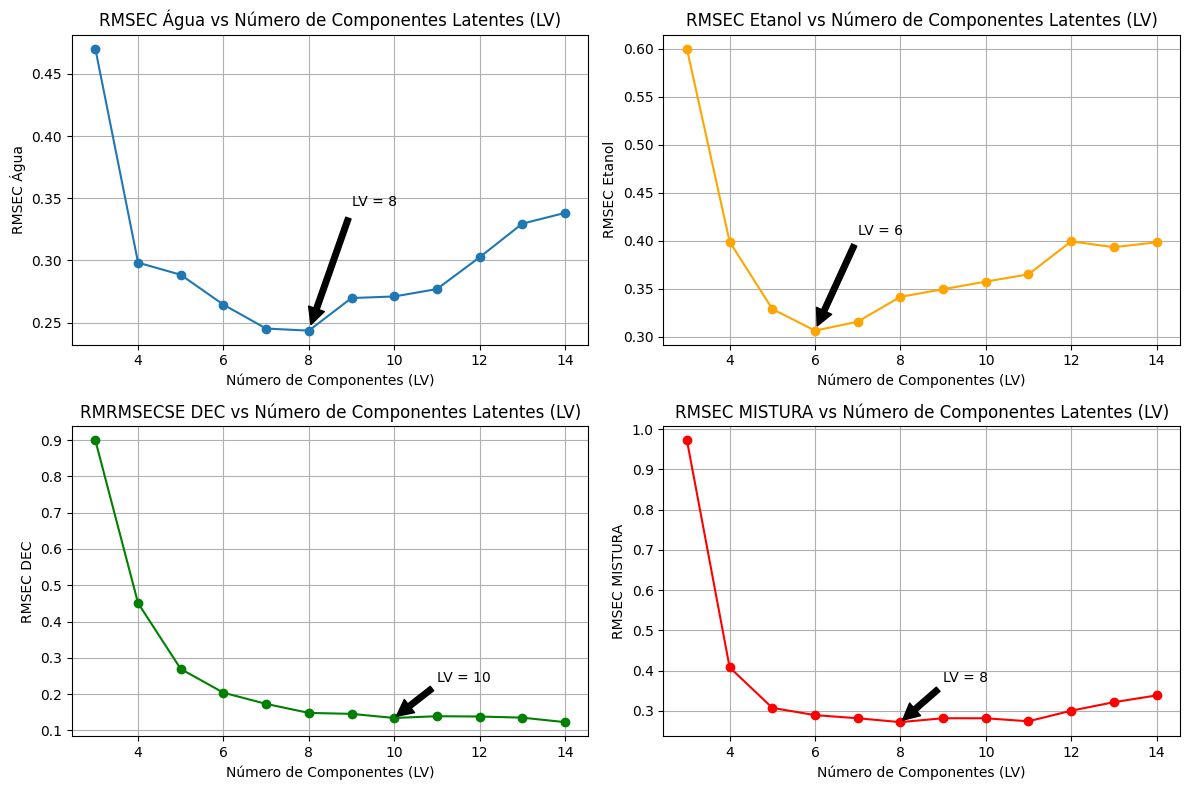

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(lv_num, rmsec_agua, marker='o')
plt.xlabel('Número de Componentes (LV)')
plt.ylabel('RMSEC Água')
plt.title('RMSEC Água vs Número de Componentes Latentes (LV)')
plt.annotate('LV = 8', xy=(8, rmsec_agua[8 - 3]), xytext=(8 + 1, rmsec_agua[8 - 3] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(lv_num, rmsec_etanol, marker='o', color='orange')
plt.xlabel('Número de Componentes (LV)')
plt.ylabel('RMSEC Etanol')
plt.title('RMSEC Etanol vs Número de Componentes Latentes (LV)')
plt.annotate('LV = 6', xy=(6, rmsec_etanol[6 - 3]), xytext=(6 + 1, rmsec_etanol[6 - 3] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(lv_num, rmsec_dec, marker='o', color='green')
plt.xlabel('Número de Componentes (LV)')
plt.ylabel('RMSEC DEC')
plt.title('RMRMSECSE DEC vs Número de Componentes Latentes (LV)')
plt.annotate('LV = 10', xy=(10, rmsec_dec[10 - 3]), xytext=(10 + 1, rmsec_dec[10 - 3] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(lv_num, rmsec_mistura, marker='o', color='red')
plt.xlabel('Número de Componentes (LV)')
plt.ylabel('RMSEC MISTURA')
plt.title('RMSEC MISTURA vs Número de Componentes Latentes (LV)')
plt.annotate('LV = 8', xy=(8, rmsec_mistura[8 - 3]), xytext=(8 + 1, rmsec_mistura[8 - 3] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
#Gerar Tabela de Dados com os resultados das escolhas de LV

df_results_treino_agua = df_results_treino[df_results_treino['lv']==8][['lv','RMSEC_agua','R²c_agua']].values
df_results_treino_etanol = df_results_treino[df_results_treino['lv']==6][['lv','RMSEC_etanol','R²c_etanol']].values
df_results_treino_dec = df_results_treino[df_results_treino['lv']==10][['lv','RMSEC_dec','R²c_dec']].values
df_results_treino_mistura = df_results_treino[df_results_treino['lv']==8][['lv','RMSEC_mistura','R²c_mistura']].values

df_results_treino = pd.concat([pd.DataFrame(df_results_treino_agua),
           pd.DataFrame(df_results_treino_etanol),
           pd.DataFrame(df_results_treino_dec),
           pd.DataFrame(df_results_treino_mistura)])
df_results_treino.columns = ['LV', 'RMSEC (%)', 'R²c']
df_results_treino['Componente'] = ['Água', 'Etanol', 'DEC', 'Mistura']
df_results_treino

,LV,RMSEC (%),R²c,Componente
0,8.0,0.243554,0.960561,Água
0,6.0,0.306449,0.995686,Etanol
0,10.0,0.134364,0.999257,DEC
0,8.0,0.271601,0.985330,Mistura


A partir do gráfico, os melhores valores para o Número de Componenentes em cada caso é:



*   Para água: 8
*   Para Etanol: 6
*   Para DEC: 10
*   Para a mistura: 8

que serão utilizados para validação.




### 4 - Validação

#### 4.1 - Predição

In [13]:
# PLS para Água
pls_agua = PLSRegression(n_components=8)
pls_agua.fit(X_train, y_train_agua)
y_pred_agua = pls_agua.predict(X_test)

# PLS para Etanol
pls_etanol = PLSRegression(n_components=6)
pls_etanol.fit(X_train, y_train_etanol)
y_pred_etanol = pls_etanol.predict(X_test)

# PLS para DEC
pls_dec = PLSRegression(n_components=10)
pls_dec.fit(X_train, y_train_dec)
y_pred_dec = pls_dec.predict(X_test)

# PLS para a mistura
pls_mistura = PLSRegression(n_components=8)
pls_mistura.fit(X_train, y_train)
y_pred_mistura = pls_mistura.predict(X_test)

#### 4.2 Avaliação dos Modelos

In [15]:
# Calcular o RMSEP e R² para Água
rmsep_agua = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_agua))
r2p_agua = r2_score(y_test[:, 0], y_pred_agua)

# Calcular o RMSEP e R² para Etanol
rmsep_etanol = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_etanol))
r2p_etanol = r2_score(y_test[:, 1], y_pred_etanol)

# Calcular o RMSEP e R² para DEC
rmsep_dec = np.sqrt(mean_squared_error(y_test[:, 2], y_pred_dec))
r2p_dec = r2_score(y_test[:, 2], y_pred_dec)

# Calcular o RMSEP e R² para Mistura
rmsep_mistura = np.sqrt(mean_squared_error(y_test, y_pred_mistura))
r2p_mistura = r2_score(y_test, y_pred_mistura)


# Exibir os resultados
print(f"RMSEP Água: {rmsep_agua*100:.6f}%, R²p Água: {r2p_agua}")
print(f"RMSEP Etanol: {rmsep_etanol*100:.6f}%, , R²p Etanol: {r2p_etanol}")
print(f"RMSEP DEC: {rmsep_dec*100:.6f}%, , R²p DEC: {r2p_dec}")
print(f"RMSEP Mistura: {rmsep_mistura*100:.6f}%, , R²p Mistura: {r2p_mistura}")

RMSEP Água: 0.206918%, R²p Água: 0.9959265812512245
RMSEP Etanol: 0.251830%, , R²p Etanol: 0.9998810735002533
RMSEP DEC: 0.110923%, , R²p DEC: 0.9999771928526422
RMSEP Mistura: 0.226737%, , R²p Mistura: 0.9985644548676874


In [19]:
# Criar um DataFrame com os resultados
df_results_predicao = pd.DataFrame({
    'LV': [8,6,10,8],
    'Componente': ['Água', 'Etanol', 'DEC', 'Mistura'],
    'RMSEP (%)': [rmsep_agua*100, rmsep_etanol*100, rmsep_dec*100, rmsep_mistura*100],
    'R²P': [r2p_agua, r2p_etanol, r2p_dec, r2p_mistura]
})

# Exibir a tabela
df_results_predicao


,LV,Componente,RMSEP (%),R²P
0,8,Água,0.206918,0.995927
1,6,Etanol,0.251830,0.999881
2,10,DEC,0.110923,0.999977
3,8,Mistura,0.226737,0.998564


### 5 -  Resultados

Abaixo, a tabela com o resultado final comparando as calibragens para cada componente isolado, e também para as misturas.

In [20]:
# Tabela com o resultado final para o Treinamento e a Validação

df_resultado_final = pd.merge(df_results_treino,df_results_predicao, on=['LV', 'Componente'], how='inner')
df_resultado_final = df_resultado_final[['Componente', 'LV', 'RMSEC (%)', 'R²c', 'RMSEP (%)', 'R²P']]
df_resultado_final


,Componente,LV,RMSEC (%),R²c,RMSEP (%),R²P
0,Água,8.0,0.243554,0.960561,0.206918,0.995927
1,Etanol,6.0,0.306449,0.995686,0.251830,0.999881
2,DEC,10.0,0.134364,0.999257,0.110923,0.999977
3,Mistura,8.0,0.271601,0.985330,0.226737,0.998564


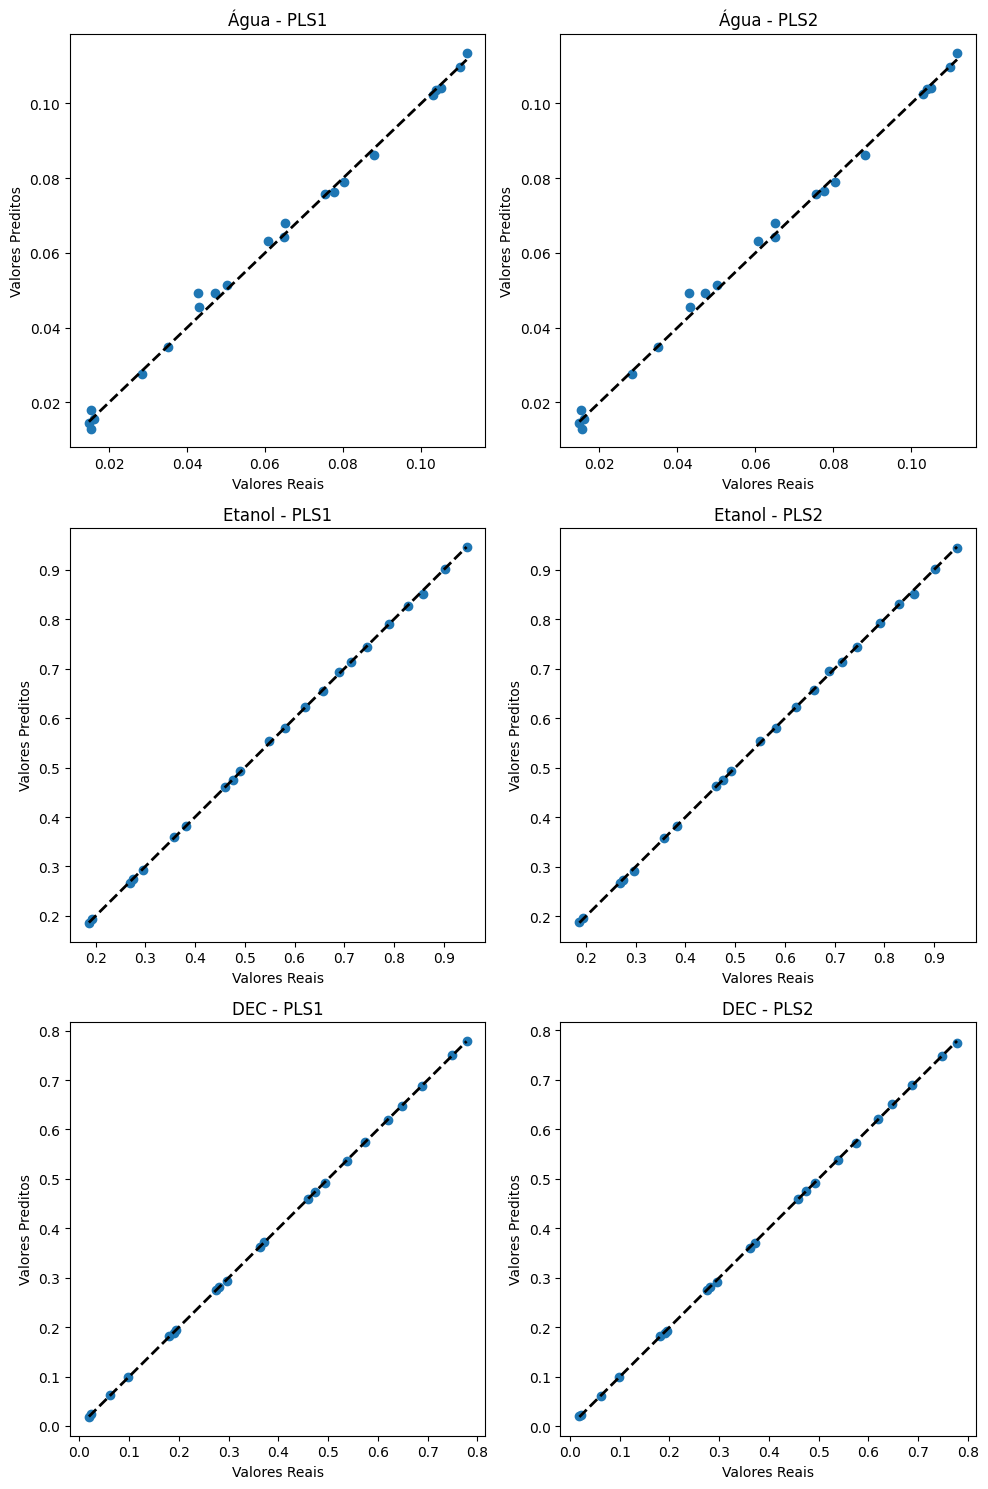

In [46]:
# Plotar os valores preditos vs reais para cada substância da amostra 1
plt.figure(figsize=(10, 15))

plt.subplot(3, 2, 1)
plt.scatter(y_test_agua, y_pred_agua)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Água - PLS1')
plt.plot([y_test_agua.min(), y_test_agua.max()], [y_test_agua.min(), y_test_agua.max()], 'k--', lw=2)

plt.subplot(3, 2, 2)
plt.scatter(y_test_agua, y_pred_mistura[:,0])
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Água - PLS2')
plt.plot([y_test_agua.min(), y_test_agua.max()], [y_test_agua.min(), y_test_agua.max()], 'k--', lw=2)

plt.subplot(3, 2, 3)
plt.scatter(y_test_etanol, y_pred_etanol)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Etanol - PLS1')
plt.plot([y_test_etanol.min(), y_test_etanol.max()], [y_test_etanol.min(), y_test_etanol.max()], 'k--', lw=2)

plt.subplot(3, 2, 4)
plt.scatter(y_test_etanol, y_pred_mistura[:,1])
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Etanol - PLS2')
plt.plot([y_test_etanol.min(), y_test_etanol.max()], [y_test_etanol.min(), y_test_etanol.max()], 'k--', lw=2)

plt.subplot(3, 2, 5)
plt.scatter(y_test_dec, y_pred_dec)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('DEC - PLS1')
plt.plot([y_test_dec.min(), y_test_dec.max()], [y_test_dec.min(), y_test_dec.max()], 'k--', lw=2)

plt.subplot(3, 2, 6)
plt.scatter(y_test_dec, y_pred_mistura[:,2])
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('DEC - PLS2')
plt.plot([y_test_dec.min(), y_test_dec.max()], [y_test_dec.min(), y_test_dec.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()
